Image size: 184 x 184
Center of the image: 92 92
Pixel value at the center: [ 67  92 172]
New pixel value at the center: [168 158  50]


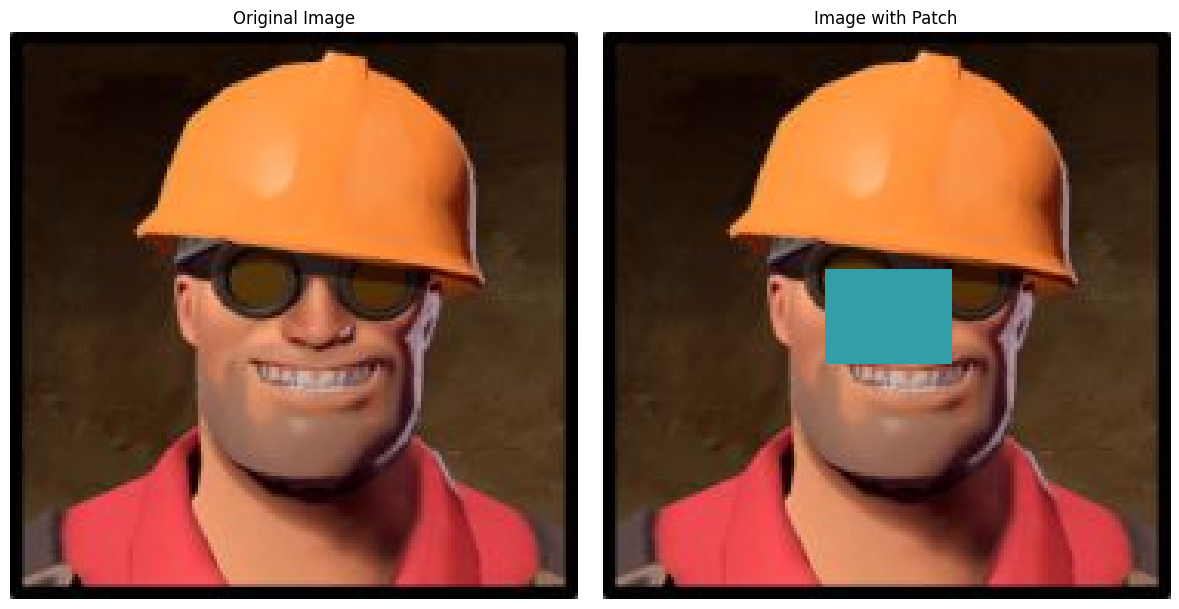

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('tf2_engineer.jpg', cv2.IMREAD_COLOR)

h, w, c = img.shape
print("Image size:", w, "x", h)

center_x = w // 2
center_y = h // 2
print("Center of the image:", center_x, center_y)

center_pixel = img[center_y, center_x]
print("Pixel value at the center:", center_pixel)

patch_w = 40
patch_h = 30

patch_color = (168, 158, 50)

top_left_x = center_x - patch_w // 2
top_left_y = center_y - patch_h // 2
bottom_right_x = center_x + patch_w // 2
bottom_right_y = center_y + patch_h // 2

img_with_patch = img.copy()
cv2.rectangle(img_with_patch, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), patch_color, -1)

new_center_pixel = img_with_patch[center_y, center_x]
print("New pixel value at the center:", new_center_pixel)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_patch_rgb = cv2.cvtColor(img_with_patch, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_patch_rgb)
plt.title("Image with Patch")
plt.axis('off')

plt.tight_layout()
plt.show()


This code reads and displays an image and finds out its width and height. then it calculates where the center of the image is and prints the color of the pixel at that center. After that, it draws rectangle (a patch) right in the middle of the image to change how it looks. I used matplotlib.pyplot at the end to display both the original image and the modified version next to each other


Pixel 1 at (y=637, x=324): Original = 111, Negative = 144
Pixel 2 at (y=297, x=109): Original = 98, Negative = 157
Pixel 3 at (y=376, x=549): Original = 97, Negative = 158
Pixel 4 at (y=105, x=661): Original = 103, Negative = 152
Pixel 5 at (y=461, x=296): Original = 97, Negative = 158


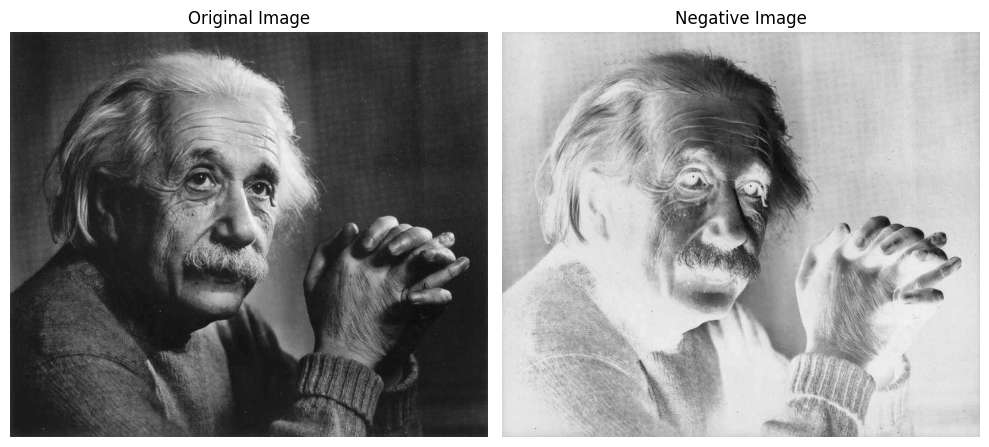

In [2]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

image = cv2.imread("einstein.tif", cv2.IMREAD_GRAYSCALE)

negative = 255 - image

height, width = image.shape
for i in range(5):
    y = random.randint(0, height - 1)
    x = random.randint(0, width - 1)
    
    original_value = image[y, x]
    negative_value = negative[y, x]
    
    print(f"Pixel {i+1} at (y={y}, x={x}): Original = {original_value}, Negative = {negative_value}")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative, cmap='gray')
plt.title("Negative Image")
plt.axis('off')

plt.tight_layout()
plt.show()


This code reads a grayscale image and subtracts each pixel from 255 to create a negative version of the image, then it uses matplotlib.pyplot to show both the original and the negative images side by side to compare them.

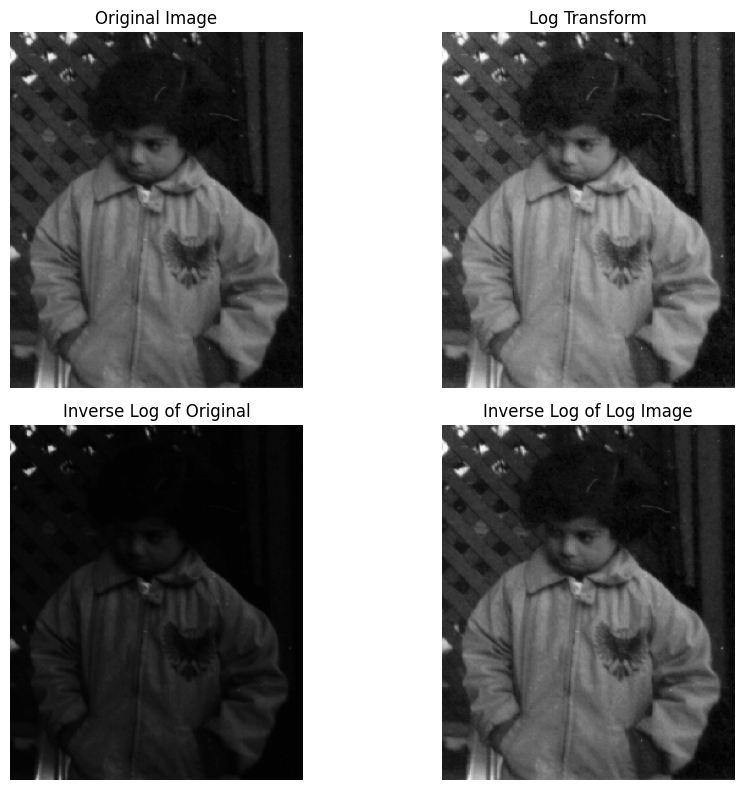

Comments:
- Step 2 (Log Transform) enhances details in dark areas by boosting low intensity values.
- Step 4 (Inverse Log of Log Image) reverses the log transform, restoring the image close to original.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

c = 255 / np.log(1 + np.max(image))

log_img = c * np.log(1 + image.astype(np.float32))
log_img = np.uint8(np.clip(log_img, 0, 255))

inv_log_orig = np.exp(image.astype(np.float32) / c) - 1
inv_log_orig = np.uint8(np.clip(inv_log_orig, 0, 255))

inv_log_log = np.exp(log_img.astype(np.float32) / c) - 1
inv_log_log = np.uint8(np.clip(inv_log_log, 0, 255))

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(log_img, cmap='gray')
plt.title("Log Transform")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(inv_log_orig, cmap='gray')
plt.title("Inverse Log of Original")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(inv_log_log, cmap='gray')
plt.title("Inverse Log of Log Image")
plt.axis('off')

plt.tight_layout()
plt.show()

print("Comments:")
print("- Step 2 (Log Transform) enhances details in dark areas by boosting low intensity values.")
print("- Step 4 (Inverse Log of Log Image) reverses the log transform, restoring the image close to original.")


In this code i applied log transformation which enhaces the dark regions . This helps enhance the dark regions, then i used the inverse 
log function twice once on the original image and once on the log-transformed image and finally, I used matplotlib.pyplot to display all four images

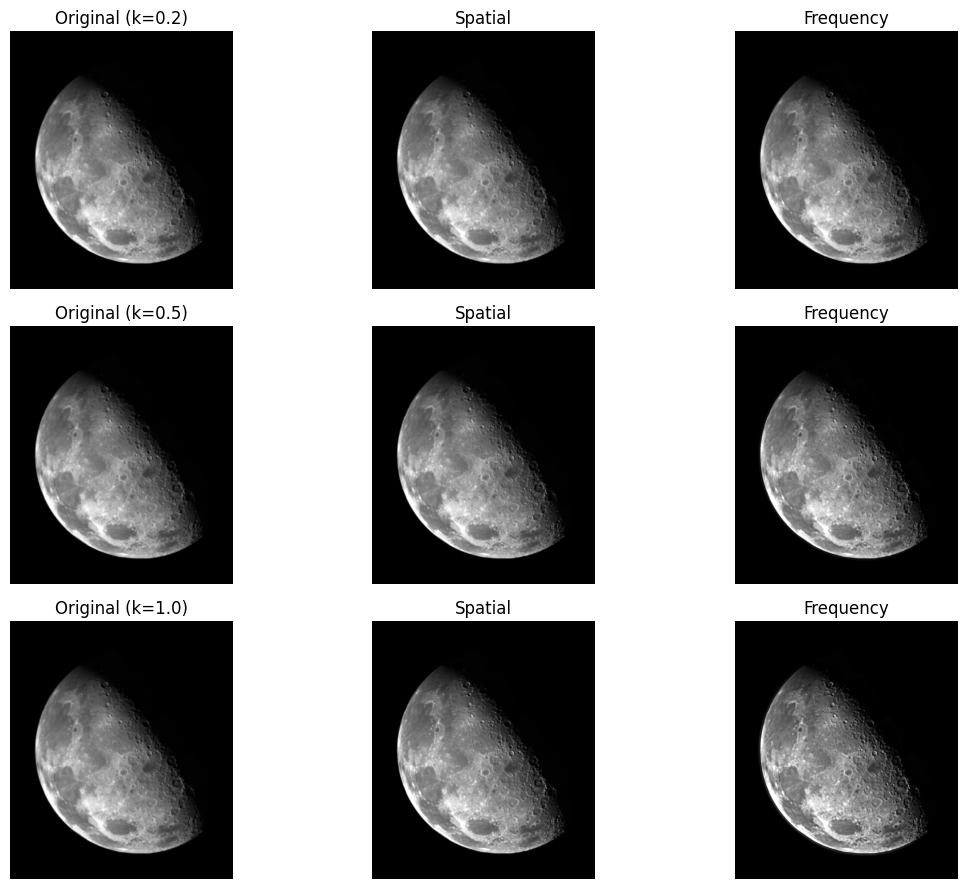

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

moon_img = cv2.imread("moon.tif", cv2.IMREAD_GRAYSCALE)

def sharpen_spatial(img, strength):
    smooth = cv2.GaussianBlur(img, (9, 9), 0)
    detail = cv2.subtract(img, smooth)
    sharp = cv2.addWeighted(img, 1.0, detail, strength, 0)
    return sharp

def sharpen_freq(img, strength, radius=30):
    h, w = img.shape

    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)

    u = np.arange(h)
    v = np.arange(w)
    u, v = np.meshgrid(u - h // 2, v - w // 2, indexing='ij')
    dist = np.sqrt(u**2 + v**2)

    hp_filter = 1 - np.exp(-(dist**2) / (2 * radius**2))

    boosted_fft = (1 + strength * hp_filter) * fft_shift
    back_img = np.fft.ifft2(np.fft.ifftshift(boosted_fft))
    result = np.abs(back_img)
    return np.uint8(np.clip(result, 0, 255))

ks = [0.2, 0.5, 1.0]
spatial_results = [sharpen_spatial(moon_img, k) for k in ks]
freq_results = [sharpen_freq(moon_img, k) for k in ks]


fig, grid = plt.subplots(3, 3, figsize=(12, 9))
for idx in range(3):
    grid[idx, 0].imshow(moon_img, cmap='gray')
    grid[idx, 0].set_title(f"Original (k={ks[idx]})")

    grid[idx, 1].imshow(spatial_results[idx], cmap='gray')
    grid[idx, 1].set_title("Spatial")

    grid[idx, 2].imshow(freq_results[idx], cmap='gray')
    grid[idx, 2].set_title("Frequency")

    for col in range(3):
        grid[idx, col].axis('off')

plt.tight_layout()
plt.show()
 


This code reads a grayscale image of the moon and apply sharpening using two different methods one in the spatial domain and one in the frequency domain. I used three different sharpening strengths (k = 0.2, 0.5, 1.0) to see how each method react at different levels finally i displayed all the images side by side.



Visual inspection and histogram analysis suggest presence of salt-and-pepper noise due to the spike at intensity values near 0 and 255.


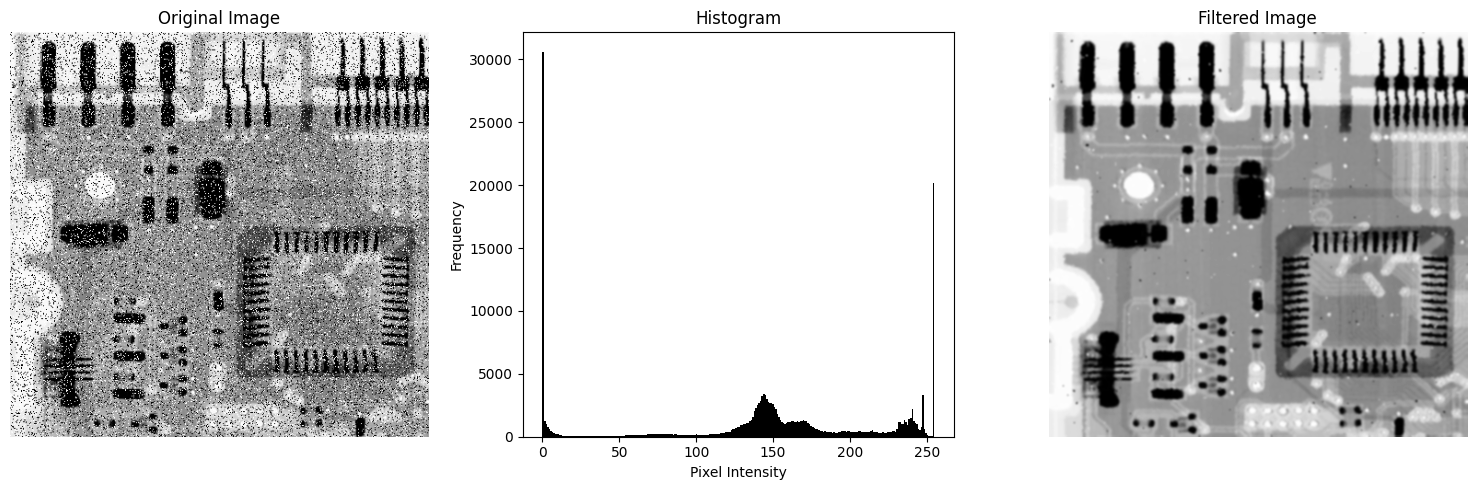

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


pcb_img = cv2.imread('pcb.tif', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(pcb_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.hist(pcb_img.ravel(), bins=256, range=(0, 255), color='black')
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

print("Visual inspection and histogram analysis suggest presence of salt-and-pepper noise "
      "due to the spike at intensity values near 0 and 255.")
median_filtered = cv2.medianBlur(pcb_img, 3)

gaussian_filtered = cv2.GaussianBlur(median_filtered, (5, 5), 0)

plt.subplot(1, 3, 3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


I loaded a grayscale image and checked its histogram to point out the intensity distribution then i used a median filter to remove the noise and a Gaussian filter to smooth the result. Then I displayed the original, the histogram, and the filtered image side by side.

The original image looks washed out, showing limited contrast.
Mean intensity: 109.08
Intensity standard deviation: 11.49

Histogram equalization improves contrast globally:
Mean intensity: 122.68
Intensity standard deviation: 77.39

Brightness adjustment shifts pixel values higher:
Mean intensity: 189.08
Intensity standard deviation: 11.49


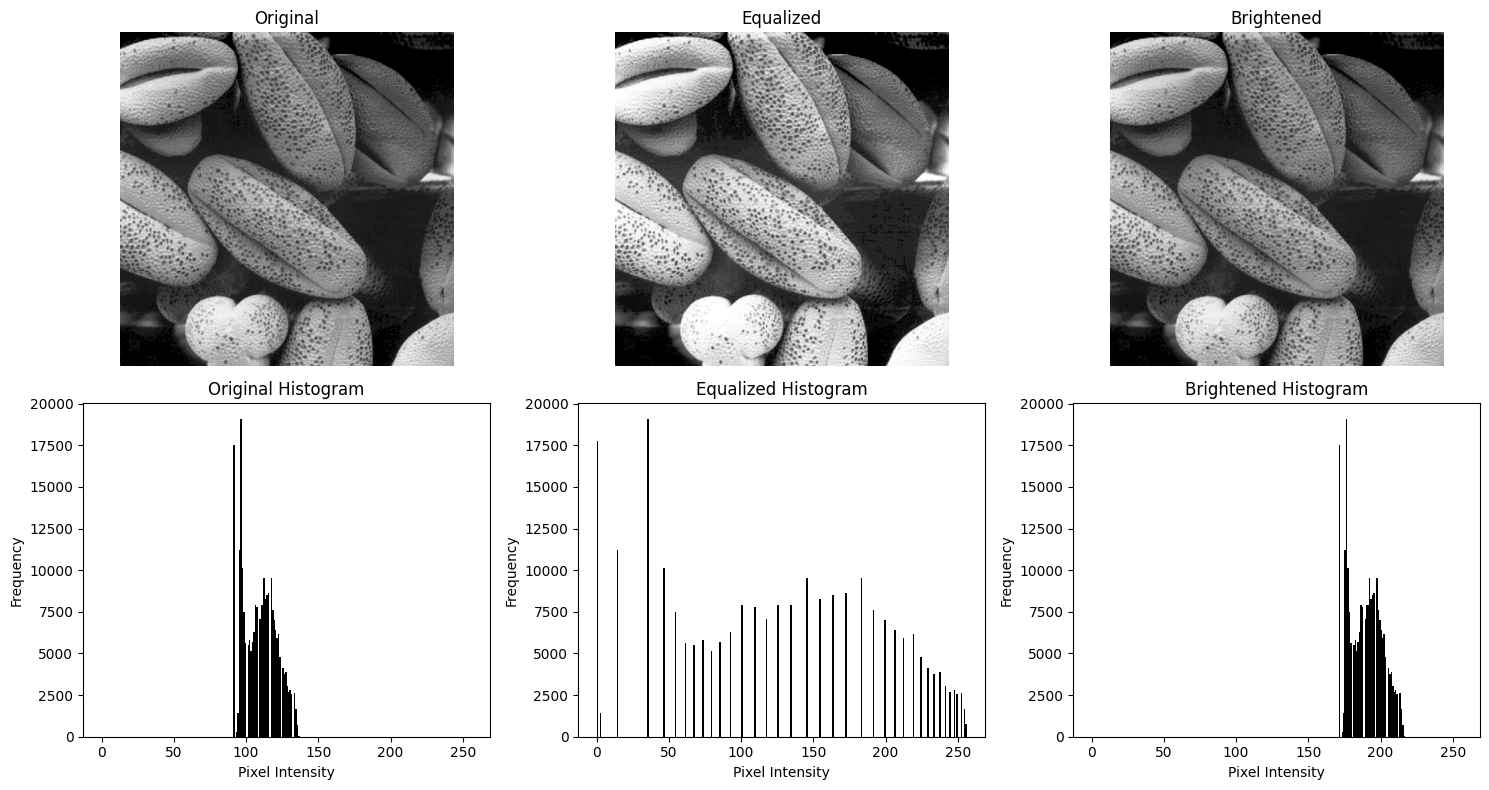

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

pollen_img = cv2.imread("pollen.tif", cv2.IMREAD_GRAYSCALE)

hist_eq_img = cv2.equalizeHist(pollen_img)

brightness_increment = 80
bright_img = cv2.add(pollen_img, brightness_increment)


print("The original image looks washed out, showing limited contrast.")
print(f"Mean intensity: {np.mean(pollen_img):.2f}")
print(f"Intensity standard deviation: {np.std(pollen_img):.2f}")

print("\nHistogram equalization improves contrast globally:")
print(f"Mean intensity: {np.mean(hist_eq_img):.2f}")
print(f"Intensity standard deviation: {np.std(hist_eq_img):.2f}")

print("\nBrightness adjustment shifts pixel values higher:")
print(f"Mean intensity: {np.mean(bright_img):.2f}")
print(f"Intensity standard deviation: {np.std(bright_img):.2f}")

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

axs[0, 0].imshow(pollen_img, cmap='gray')
axs[0, 0].set_title("Original")
axs[0, 0].axis('off')

axs[0, 1].imshow(hist_eq_img, cmap='gray')
axs[0, 1].set_title("Equalized")
axs[0, 1].axis('off')

axs[0, 2].imshow(bright_img, cmap='gray')
axs[0, 2].set_title("Brightened")
axs[0, 2].axis('off')

# Plot histograms of the images
axs[1, 0].hist(pollen_img.ravel(), bins=256, range=(0, 256), color='black')
axs[1, 0].set_title("Original Histogram")
axs[1, 0].set_xlabel("Pixel Intensity")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].hist(hist_eq_img.ravel(), bins=256, range=(0, 256), color='black')
axs[1, 1].set_title("Equalized Histogram")
axs[1, 1].set_xlabel("Pixel Intensity")
axs[1, 1].set_ylabel("Frequency")

axs[1, 2].hist(bright_img.ravel(), bins=256, range=(0, 256), color='black')
axs[1, 2].set_title("Brightened Histogram")
axs[1, 2].set_xlabel("Pixel Intensity")
axs[1, 2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


I loaded a greyscale image and applied equalization and brightness adjustment then i compared their effects by showing the images with their histograms and calculating their mean and standard deviation values.